# Rotating Mirror 程式說明
### 此程式目的在於計算雷射經由旋轉鏡組和凹面鏡經兩次反射後，最終形成動態移動的平行雷射剖面，並計算雷射剖面移動的最大距離。
### 調整參數為經由第一次反射的旋轉鏡組中，玻璃面數 (facent) 及半徑 (rotatingR)，入射雷射低於旋轉鏡組中心以下幾公分(Laserdist) 。
### 最終輸出經兩次反射後的圖示及雷射剖面移動的最大距離值。

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt 
import seaborn as sns
import statistics

Text(0, 0.5, 'Y [cm]')

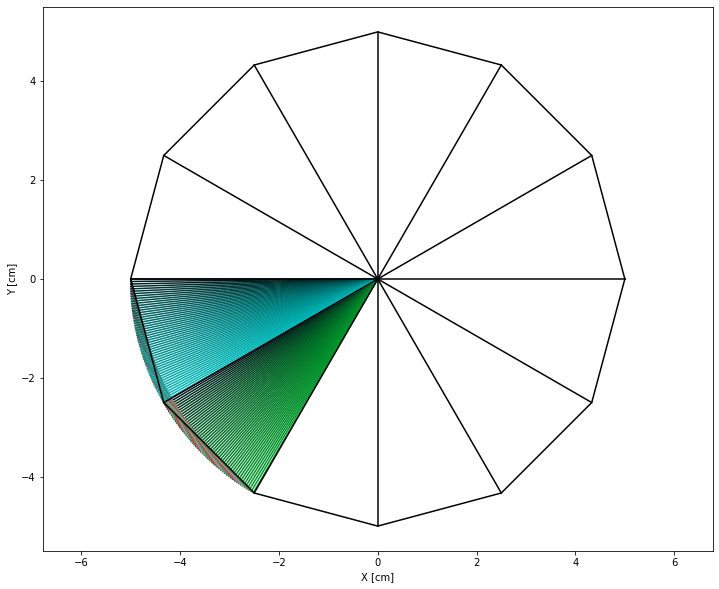

In [2]:
# Parameter input
facent = 12
rotatingR = 5
Laserdist = -2
ConcaveC = 15

# Rotating Mirror Parameters
N = facent # number of mirror faces
R = rotatingR # raduis of rotating mirror
theta = 2*math.pi/N
theta2 = np.arange(math.pi, math.pi+2*math.pi/N, 0.01)
ctheta = np.arange(0, 2*math.pi, 2*math.pi/N)


# Plot the Rotating mirror
x1 = R*np.cos(theta2)
y1 = R*np.sin(theta2) 
x2 = R*np.cos(theta + theta2) 
y2 = R*np.sin(theta + theta2) 
xA = R*np.cos(ctheta)
yA = R*np.sin(ctheta)

fig, ax = plt.subplots(figsize=(12,10))
for i in range(0,len(x1)):
    k1 = [x1[i], x2[i]]
    k2 = [y1[i], y2[i]]
    ax.plot(k1, k2) # color=(1.0,0.2,0.3))
    ax.plot([x1[i], 0], [y1[i], 0], color=(0,i**0.5 /10,i**0.5 /10))
    ax.plot([0, x2[i]], [0, y2[i]], color=(0,(i**0.5)**0.9 /10, (i**(0.1)**0.9) /10))
    
for i in range(0,len(xA)):
    ax.plot([xA[i], 0], [yA[i], 0], color = 'black')
    
ax.plot(np.append(xA, xA[0]),np.append(yA, yA[0]),color = 'black')    
ax.axis('equal')
ax.set_xlabel('X [cm]')
ax.set_ylabel('Y [cm]')


### 藉由玻璃面數 (facent) 及半徑 (rotatingR) 設計出旋轉鏡組
### 並以弧度 0.01 為間隔，畫出鏡面隨間隔旋轉後的位置 

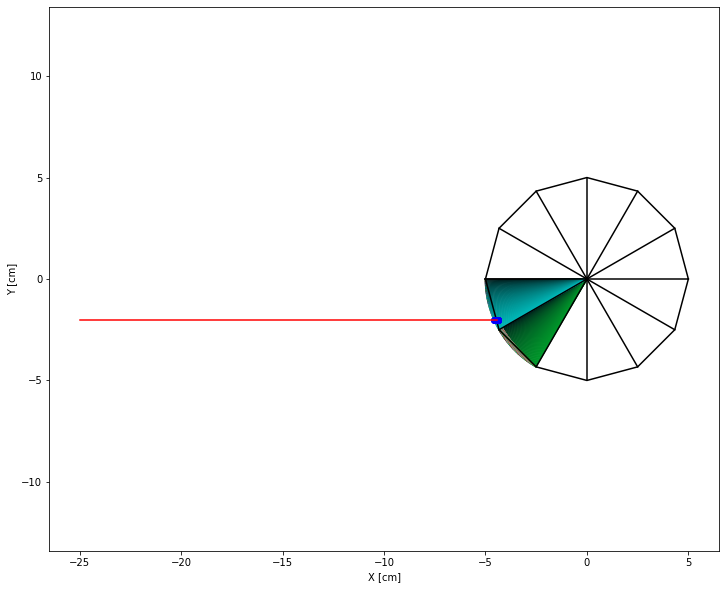

In [3]:
# Laser Points on the Different facents 
y = Laserdist;
x_laserPoint = []

for i in range(0, len(x1)):
    slope_Mirror = (y2[i]-y1[i])/(x2[i]-x1[i])
    slope_distance =   y1[i] - slope_Mirror*x1[i]
    x_simulate = (-2-slope_distance)/slope_Mirror 
    if x_simulate > x1[i]:
        x_laserPoint.append(x_simulate)

glassMid = [statistics.mean(x_laserPoint), y]
#np.shape(x_laserPoint)

# Plot the laser points on mirror facent
ax.plot(x_laserPoint, [y]*len(x_laserPoint), marker = 'o', mfc='none', color = 'blue')

# Plot lst reflecting Laser Lines 
ax.plot([-25, glassMid[0]],[y, y], '-', color = 'red')
ax.axis('equal')
fig

### 計算出雷射以距離旋轉鏡面中心高度(Laserdist)入射
### 並計算與旋轉的鏡面的相交的點位

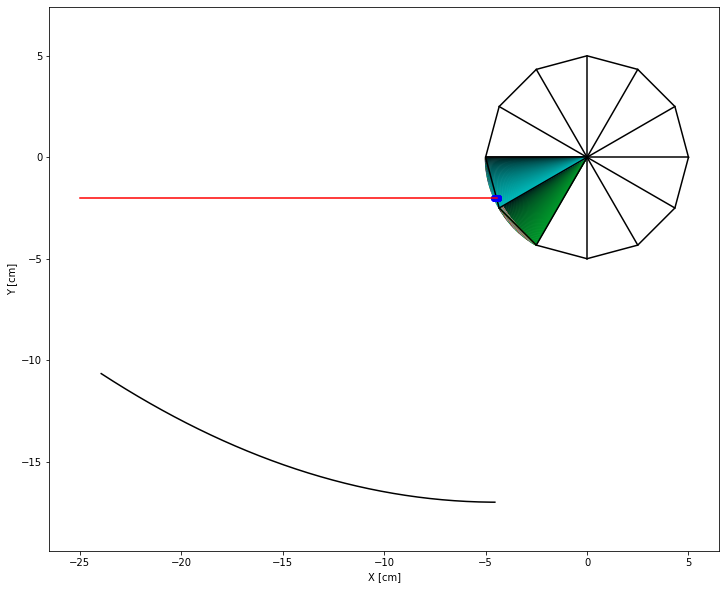

In [4]:
# Concave Mirror Parameters
c = ConcaveC
xR = np.arange(-19.5, 0, 0.1)
yR = (1/(4*c))*(xR**2)
pR = [1/(4*c), 0]

# Plot the concave mirror
xRT = xR - abs(glassMid[0])
yRT = yR - abs(c - glassMid[1])

ax.plot(xRT, yRT, '-', color = 'black')
fig

### 畫出凹面鏡與旋轉鏡組相對的位置

In [5]:
# 求出兩直線交角 (cthe)
# 並求出反射後線段點位(xthe, ythe)

cthe = []
xthe = []
ythe = []

for i in range(0, len(x_laserPoint)):
    kkl = np.array([1, 0]).reshape(1, 2)
    kk2 = np.array([(x2[i]-x1[i]), (y2[i]-y1[i])]).reshape(1, 2)
    kklT = kkl.transpose()
    uu = np.dot(kk2, kklT)
    uuAll = uu/((np.linalg.norm(kklT))*(np.linalg.norm(kk2)))
    # cthe.append(math.acos(uuAll)*180/math.pi)
    
    # 求出兩直線交角 (cthe)
    cthe.append(math.acos(uuAll))
    
    # 並求出反射後線段點位(xthe, ythe)
    xthe.append((x_laserPoint[i] - math.cos(math.pi - 2*cthe[i])))
    ythe.append((y - math.sin(math.pi - 2*cthe[i])))
# print(cthe)
# print(xthe)
# print(ythe)

# 求出反射後線段 (slope_1stReflect)

slope_1stReflect = []
slope_1stReflectdistance = []

for i in range(0, len(xthe)):
    # 求出反射後線段 (slope_1stReflect)
    slope_1st = (y-ythe[i])/(x_laserPoint[i]-xthe[i])
    slope_1stdistance =   y - slope_1st*x_laserPoint[i]
    slope_1stReflect.append(slope_1st)
    slope_1stReflectdistance.append(slope_1stdistance)

# Slope > (4.75*180/pi) == 270 degree 
# b = np.array([a >= x for a in row)

# slope_1stReflectN = list([a for a in slope_1stReflect if a <4.75])

slope_1stReflectN = []
slope_1stReflectdistanceN = []
ctheN = []
xtheN = []
ytheN = []
x_laserPointN = []
for i in range(0, len(slope_1stReflect)):
    if slope_1stReflect[i] <4.75 :
        slope_1stReflectN.append(slope_1stReflect[i])
        slope_1stReflectdistanceN.append(slope_1stReflectdistance[i])
        ctheN.append(cthe[i])
        xtheN.append(xthe[i])
        ytheN.append(ythe[i])
        x_laserPointN.append(x_laserPoint[i])



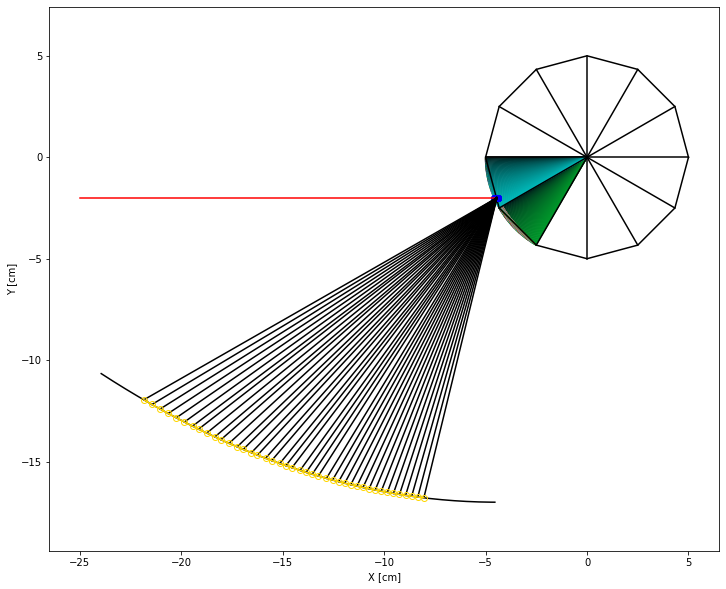

In [6]:
# Caculate the reflecting Points on concave mirror

xtry = np.arange(xRT.max(), xRT.min(), -0.1)

xc = []
yc = []
for i in range(0, len(xtheN)):
    k = 0
    yTry = -2 
    yCon = -15
    
    xcc = []
    ycc = []
    while  yTry >= yCon:
        if k <= len(xtry)-1:
            # Reflecting Line Y Point 
            fitTry = np.polyfit([xtheN[i], x_laserPointN[i]], [ytheN[i], -2], 1)
            line = np.poly1d(fitTry)
            yTry = line(xtry[k])

            # Concave Y points
            yCon = pR[0]*(xtry[k]+abs(glassMid[0]))**2 - abs(c - glassMid[1])
            # fitCon = np.polyfit(xRT, yRT, 1)
            # lineC = np.poly1d(fitCon)
            # yCon = lineC(xtry[k])
            k +=1
        else:
            break
            
    if k <= len(xtry)-1:
        xcc.append(xtry[k-1])
        ycc.append(pR[0]*(xtry[k-1]+abs(glassMid[0]))**2 - abs(c - glassMid[1]))
    else:
        xcc = []
        ycc = []
        

    for i in range(0, len(xcc)):
        if xcc[i] < -R:
            xc.append(xcc[i])
            yc.append(ycc[i])
        
            
#if xc == []:
#    ReflectingRange = math.nan
#    return ReflectingRange
for i in range(0, len(xc)):
    ax.plot([glassMid[0], xc[i]], [glassMid[1], yc[i]], '-', color = 'black')
    
ax.plot(xc, yc, marker = 'o', mfc='none', color = 'gold')    
fig   

### 藉由入射角等於反射角計算雷射經旋轉經面反射後，
### 打在凹面鏡上的位置，並以黃色圓圈標記

In [7]:
# 計算反射點在凹面鏡上焦點的斜率
# 求出第二次反射線上點位
slope_Conacave = []
cthe2 = []
xthe2 = []
ythe2 = []
for i in range(0, len(xc)):
    xT = xc[i] + abs(glassMid[0])
    slope_Conacave.append(2*pR[0]*xT)
    kk3 = np.array([1, slope_1stReflectN[i]]).reshape(1, 2)
    kk4 = np.array([1, slope_Conacave[i]]).reshape(1, 2)
    
    kk3T = kkl.transpose()
    uu2 = np.dot(kk4, kk3T)
    uuAll2 = uu2/((np.linalg.norm(kk3T))*(np.linalg.norm(kk4)))
    # cthe.append(math.acos(uuAll)*180/math.pi)
    
    # 求出兩直線交角 (cthe2) & 反射點位 (xthe2 ythe2)
    cthe2.append(math.acos(uuAll2))
    xthe2.append((xc[i] + math.cos(math.pi + 2*cthe2[i] - 2*ctheN[i])))
    ythe2.append((yc[i] + math.sin(math.pi + 2*cthe2[i] - 2*ctheN[i])))

# ax.plot(xthe2, ythe2, marker = 'o', mfc='none', color = 'gold')
# fig

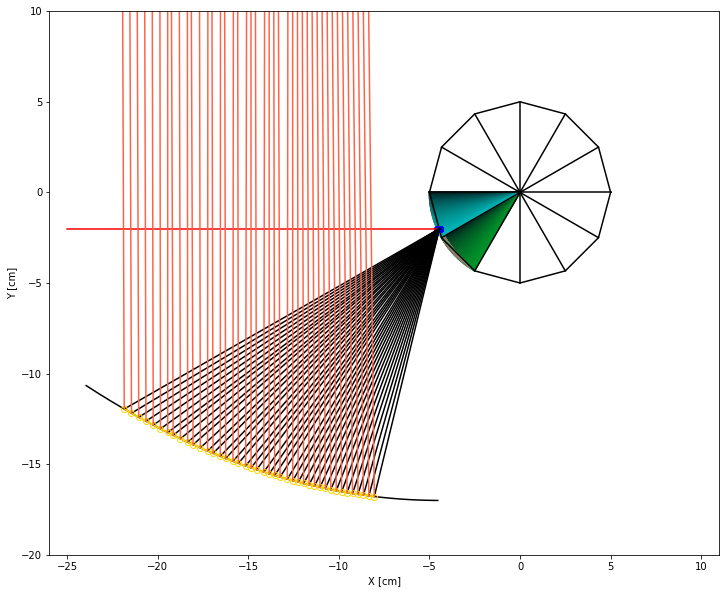

In [8]:
# 求出第二次反射線段方程式
for i in range(0, len(xthe2)):
    # slopes of 2nd reflecting lines 
    fit2ndLine = np.polyfit([xc[i], xthe2[i]], [yc[i], ythe2[i]], 1)
    line2nd = np.poly1d(fit2ndLine)
    if fit2ndLine[0] < 0:
        x2ndline = np.arange(xRT.min()-5, xc[i], 0.1)    
        y2ndline = line2nd(x2ndline)
        ax.plot(x2ndline, y2ndline, '-', color = 'tomato')
    else:
        x2ndline = np.arange(xc[i], xRT.max(), 0.1)    
        y2ndline = line2nd(x2ndline)
        ax.plot(x2ndline, y2ndline, '-', color = 'tomato')

    # print(fit2ndLine)
ax.set_xlim([-25, 10])
ax.set_ylim([-20, 10])
fig

### 再一次經由入射角等於反射角計算經由凹面鏡的反射的雷射剖面是否彼此平行
### 且計算雷射經兩次反射後，最終最大的掃描範圍。

In [9]:
ReflectingRange = abs(max(xc) - min(xc))
print(ReflectingRange)

13.799999999999955
